In [2]:
pip install mlrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=8b6a7d49047e0ef3c9be510a7789115e0f4678fb4b16cc4aa693af74fa904246
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [3]:
pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 3.4 MB/s 


In [4]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from skfeature.function.similarity_based import fisher_score
# from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('drive/MyDrive/Team_DAB/wine-quality-white-and-red.csv')
df

,Label,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,1,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df["Label"].value_counts()

0    4898
1    1599
Name: Label, dtype: int64

# DATAFRAME OF  WINE

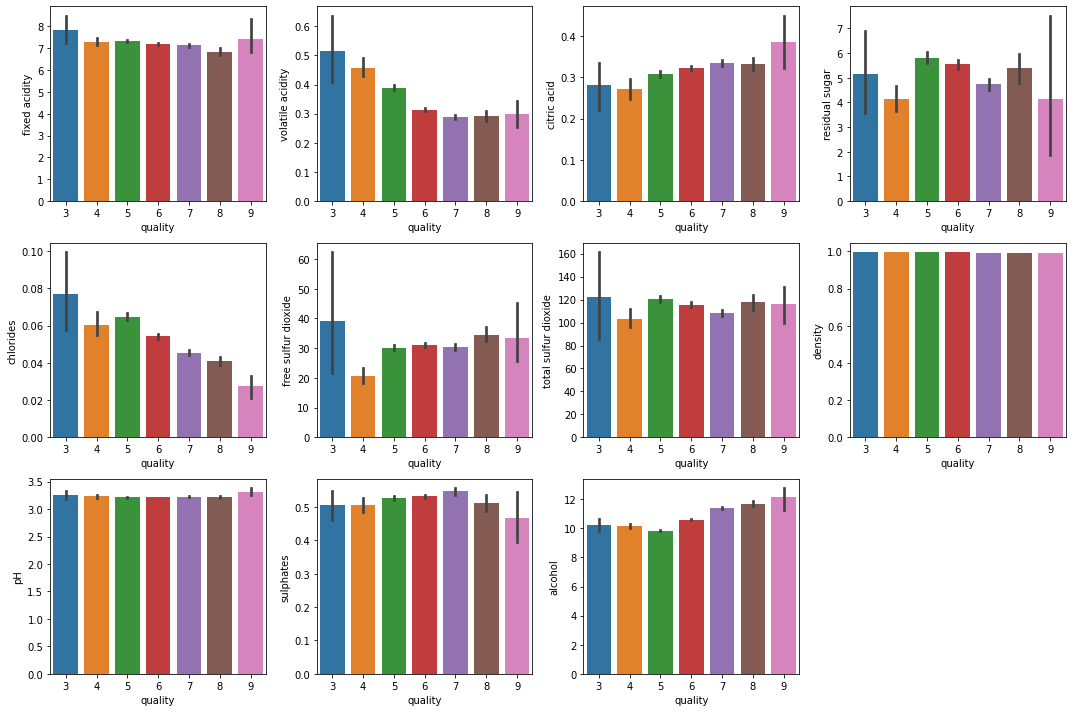

In [ ]:
# plt.scatter(df['Label'],df['fixed acidity'])
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=df)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=df)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=df)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=df)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=df)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=df)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=df)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=df)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=df)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=df)
plt.tight_layout()

In [ ]:
X = df.loc[:,"fixed acidity":"quality"]
y = df["Label"]

# Feature Selection

In [ ]:
##performing feature_selection method ->
X_train, X_test, y_train, y_test = train_test_split(X,y,
    test_size=0.25,
    random_state=42)

In [ ]:
# efs = ExhaustiveFeatureSelector (RandomForestClassifier(),min_features=4,
                                # max_features = 8,
                                # scoring = "roc_auc",
                                # cv = 2)

In [ ]:
# efs = efs.fit(X,y)

In [ ]:
# print(efs.best_indx_)

In [ ]:
# imp_feature = X_train.columns[list(efs.best_indx_)]
# print(imp_features)

In [ ]:
# print(efs.best_score_)

In [ ]:
# from sklearn.feature_selection import RFE
# rfe = RFE(lr,n_features_to_select=7)
# rfe.fit(X,y)
# y_pred = rfe.predict(X)

In [ ]:
#chlorides has the highest importance = bcz it is not correlated to other features

# total sulphur dioxide -> chlorides -> volatile acidity ->
# redidual sugar -> free sd (but it is highly corr to total) -> 
# density -> sulphates -> fixed_acidity.

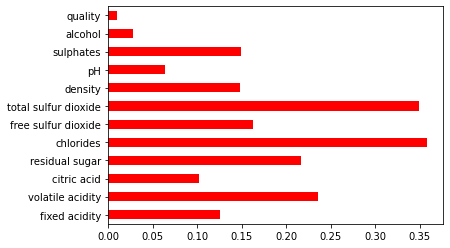

In [ ]:
#Feature Selection 1 - Information Gain
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
list_of_X_columns=df.columns[2:]
feat_importance = pd.Series(importance, list_of_X_columns)
feat_importance.plot(kind='barh', color='red')

In [ ]:
# running the k-best feature selection method on the acheived output from Informatioin Gain - Feature Selection under Filter Method
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=7)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates'],
      dtype='object')


*   Features after running k-best --> 
- [ ] Volatile acidity
- [ ] Residual sugar
- [ ] Chloride
- [ ] Free Sulphur Dioxide
- [ ] Total Sulphur Dioxide
- [ ] Density
- [ ] Sulphates




In [ ]:
#Feature Selection 2 - Random Forest Importance
model = RandomForestClassifier(n_estimators=300)
model.fit(X,y)
imp = model.feature_importances_  

*n_estimators = is the number of trees we have in the forest*

In [ ]:
final_df = pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":imp})
final_df.set_index("Importances")
final_df = final_df.sort_values("Importances")
final_df

,Features,Importances
11,quality,0.002785
10,alcohol,0.009287
2,citric acid,0.015912
8,pH,0.020942
0,fixed acidity,0.036673
3,residual sugar,0.043037
5,free sulfur dioxide,0.057207
7,density,0.057964
9,sulphates,0.059268
1,volatile acidity,0.125034


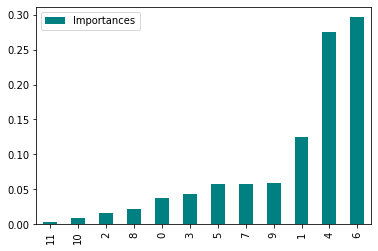

In [ ]:
final_df.plot.bar(color="teal")

In [ ]:
#Feature Selection 3 - backward feature elimination
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=7, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   47.3s finished

[2022-11-11 13:03:26] Features: 11/7 -- score: 0.9581281805273032[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   33.8s finished

[2022-11-11 13:03:59] Features: 10/7 -- score: 0.9592780561503392[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   28.1s finished

[2022-11-11 13:04:28] Features: 9/7 -- score: 0.9600218529467813[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

## We have applied k-best feature selection upon the Backward Feature Elimination Method

In [ ]:
sfs1.k_feature_idx_

(1, 3, 4, 6, 7, 8, 11)

## found the index of the relevant and important columns, using them to print the names

In [ ]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'quality'],
      dtype='object')


*   Features after running k-best --> 
- [ ] Fixed acidity
- [ ] Volatile acidity
- [ ] Residual sugar
- [ ] Chloride
- [ ] Total Sulphur Dioxide
- [ ] Density
- [ ] pH




In [ ]:
#using our 7 selected features, which are most suitable ->
X = X.drop(['pH','quality','citric acid','free sulfur dioxide','fixed acidity'] , axis=1)
X

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.270,20.7,0.045,170.0,1.00100,0.45,8.8
1,0.300,1.6,0.049,132.0,0.99400,0.49,9.5
2,0.280,6.9,0.050,97.0,0.99510,0.44,10.1
3,0.230,8.5,0.058,186.0,0.99560,0.40,9.9
4,0.230,8.5,0.058,186.0,0.99560,0.40,9.9
...,...,...,...,...,...,...,...
6492,0.600,2.0,0.090,44.0,0.99490,0.58,10.5
6493,0.550,2.2,0.062,51.0,0.99512,0.76,11.2
6494,0.510,2.3,0.076,40.0,0.99574,0.75,11.0
6495,0.645,2.0,0.075,44.0,0.99547,0.71,10.2


In [ ]:
y = df['Label']
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: Label, Length: 6497, dtype: int64

## using the selected features to build our model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

initializing our early stopping criteria

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# ANN

In [ ]:
model_ann=tf.keras.Sequential([
    layers.Flatten(input_shape=(7, )),
    layers.Dense(64,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 7)                 0         
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 58,625
Trainable params: 58,625
Non-trai

In [ ]:
model_ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"]  
             )

In [ ]:
model_ann.fit(x_train,y_train,epochs=50,validation_data=(x_test, y_test),
    batch_size=10,callbacks=[early_stopping],)

Epoch 1/50
520/520 [==============================] - 2s 3ms/step - loss: 0.2766 - accuracy: 0.9084 - val_loss: 0.2781 - val_accuracy: 0.9162
Epoch 2/50
520/520 [==============================] - 2s 3ms/step - loss: 0.2162 - accuracy: 0.9228 - val_loss: 0.2393 - val_accuracy: 0.9131
Epoch 3/50
520/520 [==============================] - 2s 3ms/step - loss: 0.2079 - accuracy: 0.9253 - val_loss: 0.2291 - val_accuracy: 0.9246
Epoch 4/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1925 - accuracy: 0.9315 - val_loss: 0.1813 - val_accuracy: 0.9338
Epoch 5/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1600 - accuracy: 0.9450 - val_loss: 0.1267 - val_accuracy: 0.9600
Epoch 6/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1326 - accuracy: 0.9579 - val_loss: 0.1067 - val_accuracy: 0.9692
Epoch 7/50
520/520 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9657 - val_loss: 0.0999 - val_accuracy: 0.9638
Epoch 

In [ ]:
y_pred = model_ann.predict(x_test)
score, acc = model_ann.evaluate(x_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)

130/130 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9785
Test score: 0.08002085983753204
Test accuracy: 97.84615635871887


In [ ]:
model_ann.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=["accuracy"]
             )
model_ann.fit(x_train,y_train,epochs=50,validation_data=(x_test, y_test),
    batch_size=10,callbacks=[early_stopping],)
y_pred = model_ann.predict(x_test)
score, acc = model_ann.evaluate(x_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)
y_pred = model_ann.predict(x_train)
score, acc = model_ann.evaluate(x_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc*100)

Epoch 1/50
520/520 [==============================] - 2s 3ms/step - loss: 0.2775 - accuracy: 0.8869 - val_loss: 0.2526 - val_accuracy: 0.8885
Epoch 2/50
520/520 [==============================] - 1s 3ms/step - loss: 0.1998 - accuracy: 0.9244 - val_loss: 0.1943 - val_accuracy: 0.9292
Epoch 3/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1972 - accuracy: 0.9277 - val_loss: 0.2355 - val_accuracy: 0.9185
Epoch 4/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1987 - accuracy: 0.9273 - val_loss: 0.4663 - val_accuracy: 0.8200
Epoch 5/50
520/520 [==============================] - 1s 3ms/step - loss: 0.2009 - accuracy: 0.9213 - val_loss: 0.2282 - val_accuracy: 0.9185
Epoch 6/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1848 - accuracy: 0.9327 - val_loss: 0.1812 - val_accuracy: 0.9354
Epoch 7/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1858 - accuracy: 0.9307 - val_loss: 0.3645 - val_accuracy: 0.9054
Epoch 

In [ ]:
y_pred


array([[0.00459789],
       [0.01924743],
       [0.12701178],
       ...,
       [0.98942995],
       [0.9930603 ],
       [0.14295389]], dtype=float32)

#### SVM

In [ ]:
train_set,test_set = train_test_split(df, train_size=0.75, random_state=1) 

In [ ]:
train_set_X= train_set.loc[:, train_set.columns!='Label']
train_set_y=train_set['Label']

test_set_X= test_set.loc[:, test_set.columns!='Label']
test_set_y=test_set['Label']

In [ ]:
# selecting the rbf kernel
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)

SVC(random_state=1)

In [ ]:
svc_y_pred = classifier.predict(x_test)

In [ ]:
svc_y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
cm = confusion_matrix(y_test,svc_y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy for SVM model: ")
print(accuracy)


Accuracy for SVM model: 
0.92


#### Logistic Regression

In [ ]:
lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

print("Training accuracy :", lr_model.score(x_train, y_train))
print("Testing accuracy :", lr_model.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9769097556282471
Testing accuracy : 0.9730769230769231
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       986
           1       0.95      0.93      0.94       314

    accuracy                           0.97      1300
   macro avg       0.97      0.96      0.96      1300
weighted avg       0.97      0.97      0.97      1300

[[972  14]
 [ 21 293]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


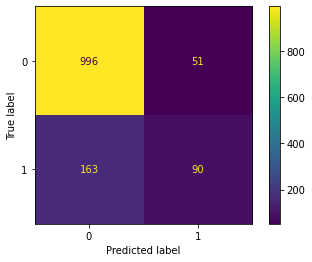

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1047
           1       0.64      0.36      0.46       253

    accuracy                           0.84      1300
   macro avg       0.75      0.65      0.68      1300
weighted avg       0.82      0.84      0.82      1300



In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()
print(classification_report(y_test, y_pred))

## XGBOOST

When to Use XGBoost?
 
Consider using XGBoost for any supervised machine learning task when satisfies the following criteria:

> -> When you have large number of observations in training data.


> -> Number features < number of observations in training data.

> -> It performs well when data has mixture numerical and categorical features or just numeric features.

> -> When the model performance metrics are to be considered.

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
model.fit(x_train, y_train)

XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=-1,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

XGBClassifier(eval_metric='mlogloss', gpu_id=-1, interaction_constraints='',
              learning_rate=0.300000012, max_depth=6, missing=-1,
              monotone_constraints='()', n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', scale_pos_weight=None,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9938461538461538

---

# Wine Quality Prediction

---



In [ ]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df

,Label,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,0,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,0,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,0,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,0,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,1,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,1,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,1,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [ ]:
X = df.loc[:,"fixed acidity":"goodquality"]
X = X.drop(['goodquality','pH','citric acid','free sulfur dioxide','fixed acidity','quality'],axis=1)
y = df['goodquality']
X

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.270,20.7,0.045,170.0,1.00100,0.45,8.8
1,0.300,1.6,0.049,132.0,0.99400,0.49,9.5
2,0.280,6.9,0.050,97.0,0.99510,0.44,10.1
3,0.230,8.5,0.058,186.0,0.99560,0.40,9.9
4,0.230,8.5,0.058,186.0,0.99560,0.40,9.9
...,...,...,...,...,...,...,...
6492,0.600,2.0,0.090,44.0,0.99490,0.58,10.5
6493,0.550,2.2,0.062,51.0,0.99512,0.76,11.2
6494,0.510,2.3,0.076,40.0,0.99574,0.75,11.0
6495,0.645,2.0,0.075,44.0,0.99547,0.71,10.2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: goodquality, Length: 6497, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(5197, 7)

In [ ]:
y_train.shape

(5197,)

In [ ]:
x_test.shape

(1300, 7)

In [ ]:
y_test.shape

(1300,)

# Random Forest Classifier


In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1047
           1       0.76      0.53      0.62       253

    accuracy                           0.88      1300
   macro avg       0.83      0.74      0.77      1300
weighted avg       0.87      0.88      0.87      1300



In [ ]:
pred_rfc


array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 5)
rfc_eval.mean()

0.8783893536684682

## Support Vector Classifier along with Grind Search cv
GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

In [ ]:
pred_svc
y_test.shape

(1300,)

In [ ]:
accuracy = accuracy_score(y_test, pred_svc)
accuracy

0.8053846153846154

In [ ]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
# grid_svc.fit(x_train, y_train)
# Best parameters for our svc model

In [ ]:
# grid_svc.best_params_

In [ ]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1047
           1       0.66      0.37      0.47       253

    accuracy                           0.84      1300
   macro avg       0.76      0.66      0.69      1300
weighted avg       0.82      0.84      0.82      1300



In [ ]:
accuracy = accuracy_score(y_test, pred_svc2)
accuracy

0.84

## ANN

In [ ]:
model1=tf.keras.Sequential([
    layers.Flatten(input_shape=(7, )),
    layers.Dense(64,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"]  
             )

In [ ]:
model1.fit(x_train,y_train,epochs=50,validation_data=(x_test, y_test),
    batch_size=10,callbacks=[early_stopping],)

Epoch 1/50
520/520 [==============================] - 4s 6ms/step - loss: 0.5422 - accuracy: 0.7966 - val_loss: 0.5129 - val_accuracy: 0.8054
Epoch 2/50
520/520 [==============================] - 2s 4ms/step - loss: 0.5001 - accuracy: 0.8026 - val_loss: 0.4934 - val_accuracy: 0.8054
Epoch 3/50
520/520 [==============================] - 2s 4ms/step - loss: 0.4926 - accuracy: 0.8030 - val_loss: 0.4824 - val_accuracy: 0.8054
Epoch 4/50
520/520 [==============================] - 2s 4ms/step - loss: 0.4913 - accuracy: 0.8030 - val_loss: 0.4791 - val_accuracy: 0.8054
Epoch 5/50
520/520 [==============================] - 2s 4ms/step - loss: 0.4835 - accuracy: 0.8030 - val_loss: 0.4715 - val_accuracy: 0.8054
Epoch 6/50
520/520 [==============================] - 2s 4ms/step - loss: 0.4778 - accuracy: 0.8035 - val_loss: 0.4673 - val_accuracy: 0.8054
Epoch 7/50
520/520 [==============================] - 3s 6ms/step - loss: 0.4748 - accuracy: 0.8020 - val_loss: 0.4816 - val_accuracy: 0.8054
Epoch 

In [ ]:
y_pred = model1.predict(x_test)
score, acc = model1.evaluate(x_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)

130/130 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8062
Test score: 0.4028361737728119
Test accuracy: 80.61538338661194


In [ ]:
model1.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=["accuracy"]
             )
model1.fit(x_train,y_train,epochs=50,validation_data=(x_test, y_test),
    batch_size=10,callbacks=[early_stopping],)
y_pred = model1.predict(x_test)
score, acc = model1.evaluate(x_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)

Epoch 1/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4655 - accuracy: 0.8047 - val_loss: 0.4756 - val_accuracy: 0.8062
Epoch 2/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4627 - accuracy: 0.8060 - val_loss: 0.4598 - val_accuracy: 0.8054
Epoch 3/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4637 - accuracy: 0.8045 - val_loss: 0.4528 - val_accuracy: 0.8062
Epoch 4/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4608 - accuracy: 0.8028 - val_loss: 0.4453 - val_accuracy: 0.8062
Epoch 5/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4555 - accuracy: 0.8047 - val_loss: 0.4441 - val_accuracy: 0.8054
Epoch 6/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4577 - accuracy: 0.8058 - val_loss: 0.4666 - val_accuracy: 0.7908
Epoch 7/50
520/520 [==============================] - 1s 3ms/step - loss: 0.4553 - accuracy: 0.8047 - val_loss: 0.4543 - val_accuracy: 0.8062
Epoch 

In [ ]:
model1.compile(
    optimizer='Adagrad',
    loss='binary_crossentropy',
    metrics=["accuracy"]
             )
model1.fit(x_train,y_train,epochs=50,validation_data=(x_test, y_test),
    batch_size=10,callbacks=[early_stopping],)
y_pred = model1.predict(x_test)
score, acc = model1.evaluate(x_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)
y_pred = model1.predict(x_train)

Epoch 1/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4369 - accuracy: 0.8055 - val_loss: 0.4286 - val_accuracy: 0.8046
Epoch 2/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4292 - accuracy: 0.8062 - val_loss: 0.4225 - val_accuracy: 0.8046
Epoch 3/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4250 - accuracy: 0.8049 - val_loss: 0.4191 - val_accuracy: 0.8046
Epoch 4/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4219 - accuracy: 0.8072 - val_loss: 0.4150 - val_accuracy: 0.8046
Epoch 5/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4192 - accuracy: 0.8072 - val_loss: 0.4120 - val_accuracy: 0.8054
Epoch 6/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4169 - accuracy: 0.8072 - val_loss: 0.4098 - val_accuracy: 0.8054
Epoch 7/50
520/520 [==============================] - 2s 3ms/step - loss: 0.4150 - accuracy: 0.8078 - val_loss: 0.4073 - val_accuracy: 0.8054
Epoch 

# DT

In [ ]:
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth = 2 , random_state = 0)
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(0.5, 0.8333333333333334, 'X[6] <= 11.575\ngini = 0.316\nsamples = 5197\nvalue = [4173, 1024]'),
 Text(0.25, 0.5, 'X[6] <= 10.625\ngini = 0.222\nsamples = 4167\nvalue = [3637, 530]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.153\nsamples = 3089\nvalue = [2832, 257]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.378\nsamples = 1078\nvalue = [805, 273]'),
 Text(0.75, 0.5, 'X[6] <= 12.55\ngini = 0.499\nsamples = 1030\nvalue = [536, 494]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.49\nsamples = 691\nvalue = [395, 296]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.486\nsamples = 339\nvalue = [141, 198]')]

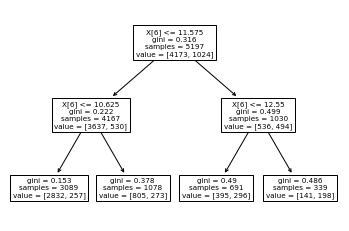

In [ ]:
tree.plot_tree(model1)

In [ ]:
fn = list(X.columns.values)
print(fn)
cn = list('goodquality')
print(cn)

['volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
['g', 'o', 'o', 'd', 'q', 'u', 'a', 'l', 'i', 't', 'y']


In [ ]:
tree.export_graphviz(model1,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [ ]:
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1047
           1       0.64      0.22      0.32       253

    accuracy                           0.82      1300
   macro avg       0.74      0.59      0.61      1300
weighted avg       0.80      0.82      0.79      1300



In [ ]:
y_test

3103    1
1419    1
4761    0
4690    0
4032    0
       ..
889     1
2850    0
4917    0
5198    0
5643    0
Name: goodquality, Length: 1300, dtype: int64

0.8238461538461539


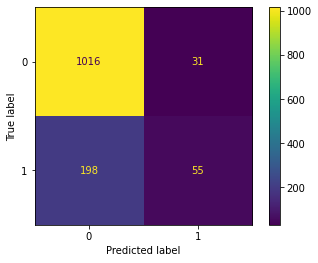

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# logistic regression

In [ ]:
model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Testing accuracy :", model.score(x_test, y_test))

Testing accuracy : 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# XGBoost

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train, y_train)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=-1,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8353846153846154

## Working on peer review suggestion

In [15]:
max = df['quality'].max()
max
min = df['quality'].min()
min
df['relative_quality'] = df.apply(lambda x: (((x['quality']-min)/(max-min))*(10-1))+1 , axis=1)

In [16]:
df

,Label,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,relative_quality
0,0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,5.5
1,0,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,5.5
2,0,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,5.5
3,0,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,5.5
4,0,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,4.0
6493,1,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,5.5
6494,1,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,5.5
6495,1,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,4.0
